In [33]:
import os
import glob

import pandas as pd
import numpy as np

%matplotlib inline

In [34]:
from helpers import *

Tillfällig ändring:

Indata är medelvärden på baskod2010. Det gör att det inte går att summera ihop till baskod2000 för områden som splittrats. Därför rensar vi bort splittrade basområden så länge.

Läs in baskodkey som i [helpers.py](helpers.py)

In [48]:
indataPath = os.path.join(os.pardir, "indata")
ddfRootPath = os.path.join(indataPath, "ddf--sodertornsmodellen")

baskodkey = pd.read_excel(os.path.join(ddfRootPath, 'etl', 'source', '161115 A7 utan formler.xlsx'), skiprows=[0,1,2,3,4,5,6], converters={2010: lambda x: str(x)})
baskodkey = baskodkey[[2010, 'BASKOD2000']]
baskodkey = baskodkey.rename(columns={2010: 'BASKOD2010'})
baskodkey['BASKOD2010'] = baskodkey['BASKOD2010'].astype(str).astype(int)

Lägg till dummykolumn för att kunna räkna förekomster av BASKOD2000

In [49]:
baskodkey['value'] = 1
baskodkey = baskodkey[['BASKOD2010', 'value']]
basomr = baskod2010tobasomrade(baskodkey, n_numeric=1)

Få fram lista på de som det bara finns en förekomst av

In [60]:
tokeep = basomr[basomr['value'] == 1][['basomrade']]

Lista borttagna

In [51]:
removed = basomr[basomr['value'] > 1]
print(len(removed))

39


Slut förberedelser tillfällig ändring.

### Per kön

In [52]:
concept = 'mean_income_aged_gt_20'

In [53]:
medelkon = glob.glob('../indata/supermappen/*MedelkonBas*.csv')

In [54]:
def readMedelkonBas(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',', header=1)
    df['year'] = pd.to_datetime(getYear(file))
    df = df.rename(columns={
        "M=1 Kv = 2":'Kön',
        'Basområde': 'BASKOD2010',
        'inkl 0': 'value',
#         'exkl 0': 'value'
    })
    df['Kön'] = df['Kön'].astype('category')
    df['Kön'].cat.categories = ['male', 'female']
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [55]:
df = pd.concat(list(map(readMedelkonBas, medelkon)))

In [56]:
df = df[['BASKOD2010', 'year','Kön', 'value']]

In [57]:
df = baskod2010tobasomrade(df, n_numeric=1)

Tillf ändring:

In [79]:
print(len(df))
merge = pd.merge(df, tokeep, on='basomrade', how='inner')
print(len(merge))
print(len(df) - len(merge))
print(156 / 3)

filt = df.isin({'basomrade': tokeep['basomrade'].tolist()})
filt = df[filt['basomrade']]
len(filt)

df = filt

4344
4188
156
52.0


Slut tillf ändring.

In [80]:
male, female = byGender(concept, df)

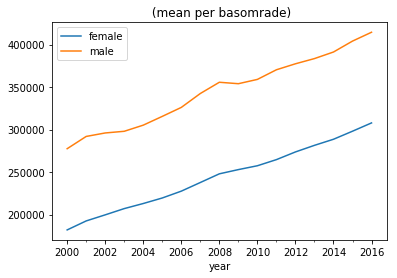

In [81]:
plotcombined(female, 'female')
plotcombined(male, 'male')

### Total

In [89]:
medel = glob.glob('../indata/supermappen/*MedelBas*.csv')

In [90]:
concept = 'mean_income_aged_gt_20'

In [91]:
def readMedel(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',')
    df['year'] = pd.to_datetime(getYear(file))
    df = df.rename(columns={
        'basomrade': 'BASKOD2010',
        'Medel': 'value'
    })
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [92]:
df = pd.concat(list(map(readMedel, medel)))

In [93]:
df = df[['BASKOD2010', 'year', 'value']]

In [94]:
df = baskod2010tobasomrade(df)

Tillf ändring:

In [95]:
print(len(df))
merge = pd.merge(df, tokeep, on='basomrade', how='inner')
print(len(merge))
print(len(df) - len(merge))
print(156 / 3)

filt = df.isin({'basomrade': tokeep['basomrade'].tolist()})
filt = df[filt['basomrade']]
len(filt)

df = filt

2172
2094
78
52.0


Slut tillf ändring.

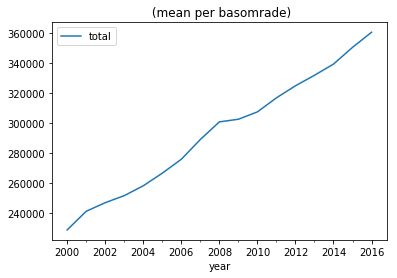

In [96]:
combined = appendNewDatapoints(concept, df)
plotcombined(combined, 'total')